@Author: Bhupinder Singh

@Date: 13-01-2023

@Last Modified by: Bhupinder Singh

@Last Modified date: 13-01-2023

@Title: The data given in the url is related with direct marketing campaigns of a banking
        institution. The marketing campaigns were based on phone calls. Often, more
        than one contact to the same client was required, in order to access if the product
        (bank term deposit) would be ('yes') or not ('no') subscribed. Build a model to
        predict whether client will subscribe to term deposit

In [1916]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from csv import reader
import seaborn as sns
import math
import operator
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Import the dataset 

In [1917]:
data = pd.read_csv('bank.csv', sep=';')

### Getting Insights of dataset

In [1918]:
data.head(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [1919]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [1920]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### Checking for Null values in data set

In [1921]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Checking for Outliers in data set

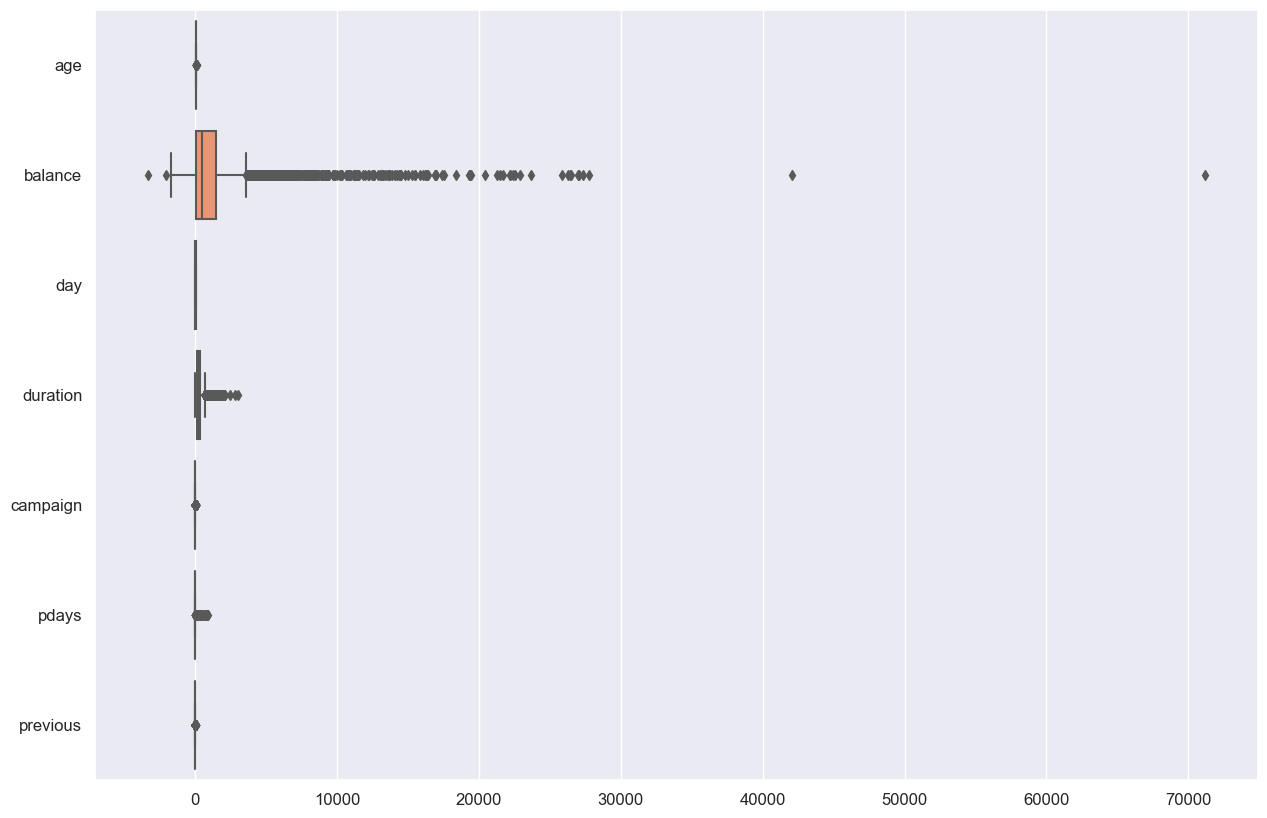

In [1922]:
#create the plot
ax = sns.boxplot(data = data[['age','balance','day','duration','campaign','pdays','previous']], orient = "h", palette = "Set2")
ax.tick_params(which = "both", labelsize = 12)
sns.set(rc={'figure.figsize':(15,10)})

### Removing Outliers

In [1923]:
def cap_data(data):
    """
    Description:
            This function is used to remove outliers
    Parameter:
        data : Imported dataset
    Return:
            Returns the data without outliers
    """
    for col in data.columns:
        print("capping the ",col)
        if (((data[col].dtype)=='float64') | ((data[col].dtype)=='int64')):
            percentiles = data[col].quantile([0.5,0.80]).values
            data[col][data[col] <= percentiles[0]] = percentiles[0]
            data[col][data[col] >= percentiles[1]] = percentiles[1]
        else:
            data[col]=data[col]
    return data

data=cap_data(data)

capping the  age
capping the  job
capping the  marital
capping the  education
capping the  default
capping the  balance
capping the  housing
capping the  loan
capping the  contact
capping the  day
capping the  month
capping the  duration
capping the  campaign
capping the  pdays
capping the  previous
capping the  poutcome
capping the  y


C:\Users\Asus\AppData\Local\Temp\ipykernel_23632\828903004.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col] <= percentiles[0]] = percentiles[0]
C:\Users\Asus\AppData\Local\Temp\ipykernel_23632\828903004.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col] >= percentiles[1]] = percentiles[1]


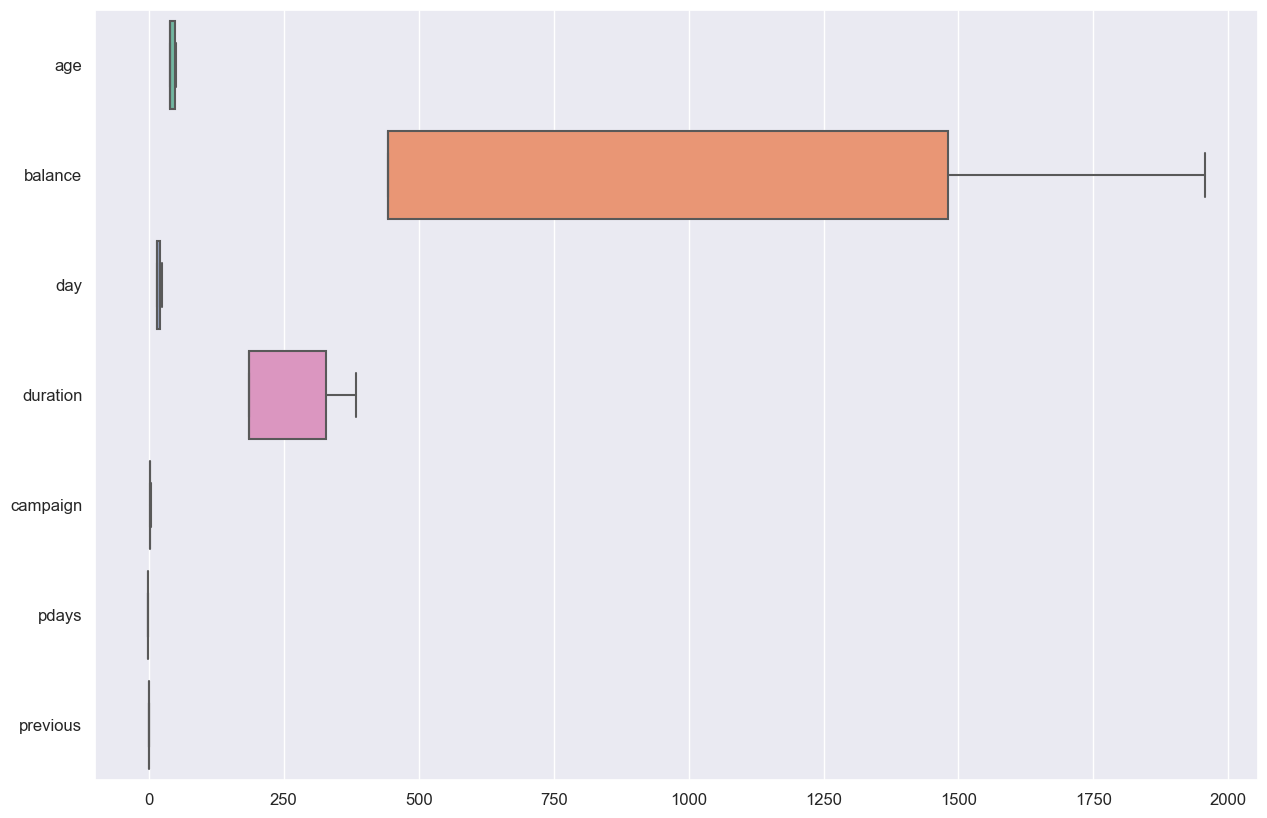

In [1924]:
#create the plot
ax = sns.boxplot(data = data[['age','balance','day','duration','campaign','pdays','previous']], orient = "h", palette = "Set2")
ax.tick_params(which = "both", labelsize = 12)
sns.set(rc={'figure.figsize':(15,10)})

data encoding

In [1925]:
data.head(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,39,unemployed,married,primary,no,1787,no,no,cellular,19,oct,185,2,-1,0,unknown,no
1,39,services,married,secondary,no,1957,yes,yes,cellular,16,may,220,2,-1,0,failure,no
2,39,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,2,-1,0,failure,no
3,39,management,married,tertiary,no,1476,yes,yes,unknown,16,jun,199,4,-1,0,unknown,no
4,51,blue-collar,married,secondary,no,444,yes,no,unknown,16,may,226,2,-1,0,unknown,no
5,39,management,single,tertiary,no,747,no,no,cellular,23,feb,185,2,-1,0,failure,no
6,39,self-employed,married,tertiary,no,444,yes,no,cellular,16,may,341,2,-1,0,other,no
7,39,technician,married,secondary,no,444,yes,no,cellular,16,may,185,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,444,yes,no,unknown,16,may,185,2,-1,0,unknown,no
9,43,services,married,primary,no,444,yes,yes,cellular,17,apr,313,2,-1,0,failure,no


label encoding

In [1926]:
data = data.drop(['contact'], axis=1)

In [1927]:
data[ 'job' ] = data[ 'job' ].astype( 'category' )  
data[ 'education' ] = data[ 'education' ].astype( 'category' ) 
data[ 'poutcome' ] = data[ 'poutcome' ].astype( 'category' ) 
data['month'] = data['month'].astype( 'category' ) 
data['marital'] = data['marital'].astype( 'category' ) 
#data['contact'] = data['contact'].astype( 'category' ) 


data['job'] = data['job'].cat.codes
data['education'] = data['education'].cat.codes
data['poutcome'] = data['poutcome'].cat.codes
data['month'] = data['month'].cat.codes
data['marital'] = data['marital'].cat.codes
#data['contact'] = data['contact'].cat.codes



Binary encoding

In [1928]:
def binary_encode(data_frame,col_name):
    """
    Description:
        Function to binary encode the categorical columns in data frame 
    Parameter:
        data_frame: Imported dataframe
        col_name: column name that need to be encoded
    Return:
            Returns encoded_list
    """
    encoded_list = []
    for i in data_frame[col_name]:
        if ((i == 'Yes') | (i== 'yes')):
            encoded_value = 1
        else:
            encoded_value = 0
        encoded_list.append(encoded_value)
    return encoded_list

In [1929]:
row,col=data.shape
default_list = binary_encode(data,'default')
data.drop(['default'],axis=1,inplace=True)
data.insert(loc=2, column="default", value=default_list)

loan_list = binary_encode(data,'loan')
data.drop(['loan'],axis=1,inplace=True)
data.insert(loc=2, column="loan", value=loan_list)

housing_list = binary_encode(data,'housing')
data.drop(['housing'],axis=1,inplace=True)
data.insert(loc=2, column="housing", value=housing_list)

y_list = binary_encode(data,'y')
data.drop(['y'],axis=1,inplace=True)
data.insert(loc=col-1, column="y", value=y_list)

In [1930]:
data.head(50)

,age,job,housing,loan,default,marital,education,balance,day,month,duration,campaign,pdays,previous,poutcome,y
0,39,10,0,0,0,1,0,1787,19,10,185,2,-1,0,3,0
1,39,7,1,1,0,1,1,1957,16,8,220,2,-1,0,0,0
2,39,4,1,0,0,2,2,1350,16,0,185,2,-1,0,0,0
3,39,4,1,1,0,1,2,1476,16,6,199,4,-1,0,3,0
4,51,1,1,0,0,1,1,444,16,8,226,2,-1,0,3,0
5,39,4,0,0,0,2,2,747,23,3,185,2,-1,0,0,0
6,39,6,1,0,0,1,2,444,16,8,341,2,-1,0,1,0
7,39,9,1,0,0,1,1,444,16,8,185,2,-1,0,3,0
8,41,2,1,0,0,1,2,444,16,8,185,2,-1,0,3,0
9,43,7,1,1,0,1,0,444,17,0,313,2,-1,0,0,0


vif

In [1931]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int8 
 2   housing    4521 non-null   int64
 3   loan       4521 non-null   int64
 4   default    4521 non-null   int64
 5   marital    4521 non-null   int8 
 6   education  4521 non-null   int8 
 7   balance    4521 non-null   int64
 8   day        4521 non-null   int64
 9   month      4521 non-null   int8 
 10  duration   4521 non-null   int64
 11  campaign   4521 non-null   int64
 12  pdays      4521 non-null   int64
 13  previous   4521 non-null   int64
 14  poutcome   4521 non-null   int8 
 15  y          4521 non-null   int64
dtypes: int64(11), int8(5)
memory usage: 410.7 KB


In [1932]:
data.head(10)

,age,job,housing,loan,default,marital,education,balance,day,month,duration,campaign,pdays,previous,poutcome,y
0,39,10,0,0,0,1,0,1787,19,10,185,2,-1,0,3,0
1,39,7,1,1,0,1,1,1957,16,8,220,2,-1,0,0,0
2,39,4,1,0,0,2,2,1350,16,0,185,2,-1,0,0,0
3,39,4,1,1,0,1,2,1476,16,6,199,4,-1,0,3,0
4,51,1,1,0,0,1,1,444,16,8,226,2,-1,0,3,0
5,39,4,0,0,0,2,2,747,23,3,185,2,-1,0,0,0
6,39,6,1,0,0,1,2,444,16,8,341,2,-1,0,1,0
7,39,9,1,0,0,1,1,444,16,8,185,2,-1,0,3,0
8,41,2,1,0,0,1,2,444,16,8,185,2,-1,0,3,0
9,43,7,1,1,0,1,0,444,17,0,313,2,-1,0,0,0


In [1933]:
X = data[list(data.columns[:-1])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

c:\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF,Column
12,185.168564,pdays
0,1.197854,age
2,1.155424,housing
5,1.144134,marital
9,1.102188,month
6,1.065743,education
1,1.052008,job
11,1.050654,campaign
7,1.033995,balance
8,1.032848,day


In [1934]:

data = data.drop(['poutcome','pdays','age','campaign','duration','day','previous'], axis=1)
X = data[list(data.columns[:-1])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
7,3.868163,month
4,3.771085,marital
5,3.439173,education
6,2.835263,balance
0,2.660250,job
1,2.357498,housing
2,1.162210,loan
3,1.026984,default


### Feature Scaling

In [1935]:
df = data[list(data.columns[:-1])]
for col in df.columns:
        print("Scaling the ",col)
        if (((data[col].dtype)=='float64') | ((data[col].dtype)=='int64') | ((data[col].dtype)=='int8') | ((data[col].dtype)=='uint8')):
                data[col] = (data[col] - data[col].mean())/data[col].std()
print("Train data")
data.head(5)

Scaling the  job
Scaling the  housing
Scaling the  loan
Scaling the  default
Scaling the  marital
Scaling the  education
Scaling the  balance
Scaling the  month
Train data


,job,housing,loan,default,marital,education,balance,month,y
0,1.716614,-1.141925,-0.424709,-0.130744,-0.246402,-1.644573,1.416619,1.485250,0
1,0.795158,0.875521,2.354032,-0.130744,-0.246402,-0.309004,1.691791,0.819197,0
2,-0.126299,0.875521,-0.424709,-0.130744,1.421239,1.026566,0.709265,-1.845016,0
3,-0.126299,0.875521,2.354032,-0.130744,-0.246402,1.026566,0.913216,0.153144,0
4,-1.047755,0.875521,-0.424709,-0.130744,-0.246402,-0.309004,-0.757241,0.819197,0


###  Split the dataset into training set and test set

In [1936]:
# Select ratio
ratio = 0.80
  
total_rows = data.shape[0]
train_size = int(total_rows*ratio)
  
# Split data into test and train
train_data = data[0:train_size]
test_data = data[train_size:]


# print train set
print("Train dataframe")
display(train_data)
  
# print test set
print("Test dataframe")
display(test_data)

train_data.shape, test_data.shape

Train dataframe


,job,housing,loan,default,marital,education,balance,month,y
0,1.716614,-1.141925,-0.424709,-0.130744,-0.246402,-1.644573,1.416619,1.485250,0
1,0.795158,0.875521,2.354032,-0.130744,-0.246402,-0.309004,1.691791,0.819197,0
2,-0.126299,0.875521,-0.424709,-0.130744,1.421239,1.026566,0.709265,-1.845016,0
3,-0.126299,0.875521,2.354032,-0.130744,-0.246402,1.026566,0.913216,0.153144,0
4,-1.047755,0.875521,-0.424709,-0.130744,-0.246402,-0.309004,-0.757241,0.819197,0
...,...,...,...,...,...,...,...,...,...
3611,1.409462,0.875521,-0.424709,-0.130744,1.421239,-0.309004,-0.757241,0.819197,0
3612,-0.126299,-1.141925,-0.424709,-0.130744,-1.914043,1.026566,-0.757241,0.819197,0
3613,1.409462,-1.141925,-0.424709,-0.130744,-0.246402,-0.309004,1.691791,0.819197,0
3614,0.180854,-1.141925,-0.424709,-0.130744,-1.914043,1.026566,-0.757241,-1.511990,0


Test dataframe


,job,housing,loan,default,marital,education,balance,month,y
3616,-0.126299,-1.141925,-0.424709,-0.130744,1.421239,1.026566,-0.757241,-0.179883,0
3617,-1.047755,-1.141925,-0.424709,-0.130744,-0.246402,-0.309004,-0.757241,-0.179883,0
3618,-1.354907,-1.141925,-0.424709,-0.130744,-0.246402,-0.309004,-0.757241,-0.179883,0
3619,1.409462,0.875521,-0.424709,-0.130744,-0.246402,-1.644573,-0.757241,0.819197,0
3620,0.180854,-1.141925,2.354032,-0.130744,-1.914043,-0.309004,-0.507967,-0.179883,0
...,...,...,...,...,...,...,...,...,...
4516,0.795158,0.875521,-0.424709,-0.130744,-0.246402,-0.309004,-0.757241,-0.179883,0
4517,0.488006,0.875521,2.354032,7.646823,-0.246402,1.026566,-0.757241,0.819197,0
4518,1.409462,-1.141925,-0.424709,-0.130744,-0.246402,-0.309004,-0.757241,-1.511990,0
4519,-1.047755,-1.141925,-0.424709,-0.130744,-0.246402,-0.309004,0.364490,-0.845936,0


((3616, 9), (905, 9))

### Extracting the values of features

In [1937]:
rows,col=train_data.shape
data_n=train_data.values
m=len(data_n[:,-1])
print(m)
x_train=data_n[:,0:col-1].reshape(m,col-1)
x_train = np.append(np.ones((m,1)),x_train,axis=1)
y_train=data_n[:,-1].reshape(m,1)
theta=np.zeros((col,1))

3616


In [1938]:
print(x_train)
print(y_train)

[[ 1.          1.71661386 -1.14192506 ... -1.64457344  1.41661904
   1.48525015]
 [ 1.          0.79515766  0.87552051 ... -0.30900374  1.6917912
   0.81919689]
 [ 1.         -0.12629854  0.87552051 ...  1.02656596  0.70926475
  -1.84501615]
 ...
 [ 1.          1.40946179 -1.14192506 ... -0.30900374  1.6917912
   0.81919689]
 [ 1.          0.18085353 -1.14192506 ...  1.02656596 -0.75724095
  -1.51198952]
 [ 1.         -1.3549068  -1.14192506 ... -0.30900374 -0.25060046
  -0.84593626]]
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [1939]:
print(x_train.shape)
print(y_train.shape)

(3616, 9)
(3616, 1)


In [1940]:
def sigmoid(z):
    """
    Description:
            Function used to give sigmoid of z
    Parameter:
        Z : parameter which will be converted to sigmoid
    Return: 
            return the sigmoid of z
    """
    
    return 1/ (1 + np.exp(-z))
# testing the sigmoid function
sigmoid(0)

0.5

In [1941]:
def costFunction(theta, X, y):
    """
    Description:
            Function used to calculate the cost value.
    Parameter:
        X: x values from train dataset
        y: y values from train dataset
        theta: initial theta values     
    Return:
            return the logistic regression cost function and gradient
    """
    
    m=len(y)
    
    predictions = sigmoid(np.dot(X,theta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * np.sum(error)
    
    grad = 1/m * np.dot(X.transpose(),(predictions - y))
    
    return cost , grad

In [1942]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Description:
            update theta by taking num_iters gradient steps with learning rate of alpha
    Parameter:
        X: x values from train dataset
        y: y values from train dataset
        theta: initial theta values 
        alpha: learning rate
        num_iters: Number of epochs
    Return:
            Returns the computed theta and cost function value
    """
    
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunction(theta,X,y)
        theta = theta - (alpha * grad)
        J_history.append(cost)
        print(f"For Epoch {i} Theta :{theta} Cost = {cost}")
    
    return theta , J_history,cost

In [1943]:
alpha= 0.1
epochs= 500
theta,J_history,cost= gradientDescent(x_train,y_train,theta,alpha,epochs)
print(f"Final theta values : {theta} with cost = {cost}")
print(f"h(x) = {str(round(theta[0,0],2))} + {str(round(theta[1,0],2))} x1 + {str(round(theta[2,0],2))}x2 +{str(round(theta[3,0],2))} x3 + {str(round(theta[4,0],2))}x4 +{str(round(theta[5,0],2))} x5 + {str(round(theta[6,0],2))}x6")

For Epoch 0 Theta :[[-0.0386615 ]
 [ 0.00106473]
 [-0.0034422 ]
 [-0.00286838]
 [ 0.00010776]
 [ 0.00055625]
 [ 0.00140161]
 [ 0.00307407]
 [-0.00185924]] Cost = 0.6931471805599452
For Epoch 1 Theta :[[-0.07635565]
 [ 0.0020755 ]
 [-0.00678049]
 [-0.00564083]
 [ 0.00022105]
 [ 0.00108585]
 [ 0.00274758]
 [ 0.00606074]
 [-0.00363476]] Cost = 0.678029086022292
For Epoch 2 Theta :[[-0.1131074 ]
 [ 0.00303475]
 [-0.01001853]
 [-0.00832073]
 [ 0.00033942]
 [ 0.00159002]
 [ 0.00404024]
 [ 0.00896276]
 [-0.00532997]] Cost = 0.6636635702677418
For Epoch 3 Theta :[[-0.14894176]
 [ 0.0039449 ]
 [-0.01316005]
 [-0.01091154]
 [ 0.00046243]
 [ 0.00207   ]
 [ 0.0052819 ]
 [ 0.01178291]
 [-0.00694826]] Cost = 0.6500122985228909
For Epoch 4 Theta :[[-0.18388362]
 [ 0.00480837]
 [-0.01620879]
 [-0.01341676]
 [ 0.00058962]
 [ 0.00252699]
 [ 0.00647489]
 [ 0.01452404]
 [-0.00849302]] Cost = 0.6370384221409371
For Epoch 5 Theta :[[-0.21795771]
 [ 0.00562752]
 [-0.01916849]
 [-0.01583989]
 [ 0.00072059]
 [

Text(0.5, 1.0, 'Cost function using Gradient Descent')

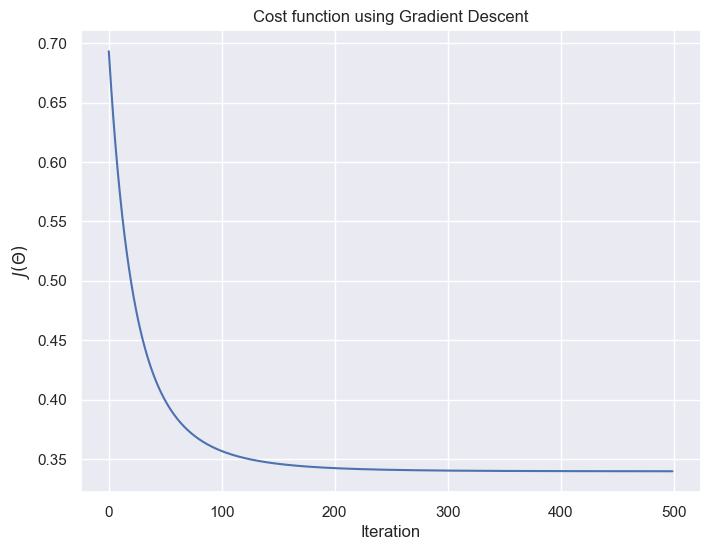

In [1944]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### Implementing Performances Metrices

In [1945]:
rows,col=test_data.shape
data_x=test_data.values
m2=len(data_x[:,-1])
x_test=data_x[:,0:col-1].reshape(m2,col-1)
x_test = np.append(np.ones((m2,1)),x_test,axis=1)
y_test=data_x[:,-1].reshape(m2,1)

In [1946]:
y_pred = sigmoid(np.dot(x_test,theta))
print(y_test.shape)
print(y_pred.shape)

(905, 1)
(905, 1)


In [1947]:
print(y_pred)

[[0.14872998]
 [0.12694286]
 [0.12588556]
 [0.06648185]
 [0.07138914]
 [0.09456887]
 [0.17415312]
 [0.09390196]
 [0.09113421]
 [0.1282035 ]
 [0.03958841]
 [0.07128096]
 [0.0725948 ]
 [0.13511134]
 [0.09838143]
 [0.12166383]
 [0.17155059]
 [0.05074579]
 [0.03686244]
 [0.08589644]
 [0.17591467]
 [0.07131615]
 [0.07538519]
 [0.17965302]
 [0.06188328]
 [0.0760926 ]
 [0.15804663]
 [0.10420082]
 [0.22562246]
 [0.06325111]
 [0.04029749]
 [0.14350029]
 [0.08412506]
 [0.09928349]
 [0.13715409]
 [0.15387548]
 [0.08939449]
 [0.07978771]
 [0.14647282]
 [0.11758979]
 [0.25148567]
 [0.11262924]
 [0.18486966]
 [0.1443144 ]
 [0.07592298]
 [0.14948495]
 [0.12694286]
 [0.07115636]
 [0.07766332]
 [0.13048498]
 [0.0725948 ]
 [0.18366569]
 [0.07676842]
 [0.07701942]
 [0.06432247]
 [0.1249678 ]
 [0.1274582 ]
 [0.22910166]
 [0.0815647 ]
 [0.15804663]
 [0.23334845]
 [0.03585615]
 [0.13906072]
 [0.03954252]
 [0.12255864]
 [0.09023332]
 [0.13475075]
 [0.06768018]
 [0.15535674]
 [0.0815647 ]
 [0.20067155]
 [0.09

In [1948]:
print(y_test)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.

In [1949]:
for i in range(0,len(y_pred)):
    if(y_pred[i]>=0.5):
        y_pred[i]=1
    else:
        y_pred[i]=0
print(y_pred)            

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

### Performance Metrices 

In [1952]:
def Evaluate(y_true, y_pred):
    n_correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            n_correct += 1
    acc = n_correct/len(y_true)
    return acc

In [1954]:
print(f"Accuracy = {Evaluate(y_test, y_pred)}")

Accuracy = 0.8773480662983425
